# Mínimos cuadrados lineales

**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
np.set_printoptions(precision = 4)

## Ejercicio 1
### Estimación de mínimos cuadrados lineales con y sin intercepto utilizando factorización $QR$
Realizar el ajuste correspondiente al ejercicio de las notas para el caso con QR (convertirlo en un modelo sin intercepto)

In [2]:
# Replicando los datos del ejercicio de clase.
np.random.seed(1989)
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

In [3]:
# Resolver el sistema para obtener los betas del modelo con intercepto
A = np.ones((mpoints, 2))
A[:,1] = x # note que la primera columna tiene 1s para incluir el intercepto en phi0
Q, R = np.linalg.qr(A) 
beta = np.linalg.solve(R,Q.T@y)
yhat_QR_i = A@beta
# Modelo sin intercepto
A_n = np.empty([mpoints, 1]) # crear matriz 2d de 1s
A_n[:,0] = x # ahora la matriz A solo tiene los datos de x
Q_n, R_n = np.linalg.qr(A_n)
beta_n = np.linalg.solve(R_n,Q_n.T@y)
yhat_QR_ni = A_n@beta_n # y estimado sin intercepto

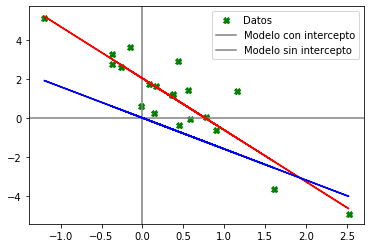

In [4]:
plt.plot(x,y, 'gX')
plt.axhline(y=0, linestyle='-', color='grey'), plt.axvline(x=0, linestyle='-', color='grey')
plt.plot(x, yhat_QR_i, 'r-', x, yhat_QR_ni, 'b-')
plt.legend(('Datos', 'Modelo con intercepto', 'Modelo sin intercepto'), loc='best')
plt.show()

## Ejercicio 2 
### Calculo de error cuadrático medio
Calcular el error cuadrático medio (ECM) de los ajustes ejercicios en las notas de clase.<br><br>

$\clubsuit$**Tomado de las notas de clase:**<br>
Si $\hat{y}_i$ es el valor ajustado para el dato $x_i$, esto es: $\hat{y}_i = f(x_i|\hat{\beta}) = \displaystyle \sum_{i=0}^m \left (y_i -\displaystyle \sum_{j=1}^n\hat{\beta}_j\phi_j(x_i)\right )^2$ el residual $i$ es: $r_i = y_i - \hat{y}_i$ y representa la discrepancia entre los datos y el modelo.

El error cuadrático medio se calcula como: $$ECM(\hat{y}) = \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$
$\clubsuit$<br><br>
Tomando como referencia lo anterior, y dado que en el ejercicio 1 se calcularon ${\hat{y}_{i_{int}}}$, y ${\hat{y}_{i_{no-int}}}$, lo que hace factible calcular el residual para ambos modelos y computar el $ECM$. A continuación se hace una función para realizar dicha tarea.

In [5]:
def cal_ecm(y, yhat): 
    ecm = 0
    for a, b in zip(y,yhat):
        resid_sq = (a-b)**2
        ecm =+ resid_sq
    return ecm

In [6]:
ecm_i = '{0:.5f}'.format(cal_ecm(y, yhat_QR_i))
ecm_ni = '{0:.5f}'.format(cal_ecm(y, yhat_QR_ni))
print('-'*20)
print(f"El ECM del modelo con intercepto es {ecm_i}.")
print(f"El ECM del modelo sin intercepto es {ecm_ni}.")
print('-'*20)

--------------------
El ECM del modelo con intercepto es 0.05186.
El ECM del modelo sin intercepto es 4.81711.
--------------------


## Ejercicio 3
### Ajuste de un modelo por mínimos cuadrados lineales con funciones $\phi_j$'s no lineales
De las notas de clase, ajustar el modelo 3. Calcular el ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?<br>
Nota: los datos son obtenidos del archivo disponible en https://drive.google.com/file/d/1Ht7d2E1LWw7EIrrkULFQ_7-5nGVxHT4P/view

In [10]:
# Retomando los pasos realizados en clase para realizar el ejercicio:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)
x = datos[:, 0]
y = datos[:, 1]

**Modelo 1**
$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$

In [56]:
phi_1 = lambda var: var/(var+1)
mpoints, = x.shape
A = np.ones((mpoints,2))
A[:,1] = phi_1(x) # construimos la matriz A y extraemos sus factores QR
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
y_mod1 = A@beta # y estimadas
# ECM:
ecm_mod1 = '{0:.5f}'.format(cal_ecm(y, y_mod1))

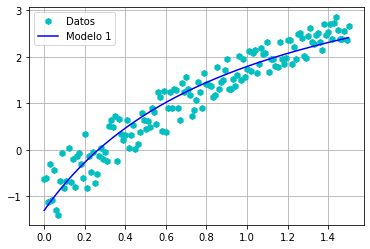

--------------------
        ECM
--------------------
Modelo 1 : 0.05915.
--------------------


In [99]:
# Gráfica de los datos, modelo, y ECM
plt.plot(x, y,'ch',x, y_mod1,'b-')
plt.legend(('Datos', 'Modelo 1'), loc='best')
plt.grid(True)
plt.show()

print
print('-'*20); print('        ECM'); print('-'*20);
print(f"Modelo 1 : {ecm_mod1}.")
print('-'*20)

**Modelo 2**
$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$

In [57]:
#No requerimos construir A pues es un polinomio de grado2 por lo que usamos polyfit de numpy:
ngrado = 2
coeficientes = np.polyfit(x,y,ngrado)
y_mod2 = coeficientes[2] + coeficientes[1] * x + coeficientes[0] * x**2
# ECM:
ecm_mod2 = '{0:.5f}'.format(cal_ecm(y, y_mod2))

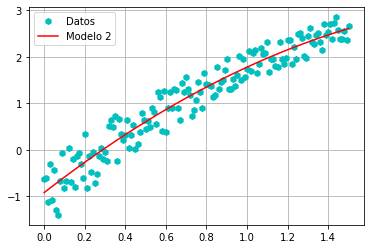

--------------------
        ECM
--------------------
Modelo 2 : 0.00214.
--------------------


In [100]:
# Gráfica de los datos, modelo, y ECM
plt.plot(x, y,'ch',x, y_mod2,'r-')
plt.legend(('Datos', 'Modelo 2'), loc='best')
plt.grid(True)
plt.show()

print
print('-'*20); print('        ECM'); print('-'*20);
print(f"Modelo 2 : {ecm_mod2}.")
print('-'*20)

**Modelo 3**
$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

In [58]:
phi1_m3 = lambda var: np.log(var+1)
mpoints, = x.shape
A = np.ones((mpoints, 2))
A[:, 1] = phi1_m3(x) # evaluamos phi1 en x para la segunda columna
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R, Q.T@y)
y_mod3 = A@beta
# ECM:
ecm_mod3 = '{0:.5f}'.format(cal_ecm(y, y_mod3))

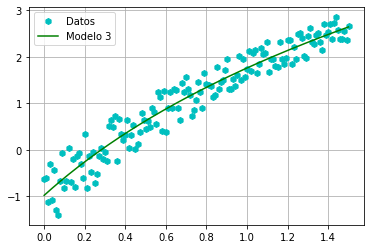

--------------------
        ECM
--------------------
Modelo 3 : 0.00014.
--------------------


In [101]:
# Gráfica de los datos, modelo, y ECM
plt.plot(x, y,'ch',x, y_mod3,'g-')
plt.legend(('Datos', 'Modelo 3'), loc='best')
plt.grid(True)
plt.show()

print
print('-'*20); print('        ECM'); print('-'*20);
print(f"Modelo 3 : {ecm_mod3}.")
print('-'*20)

In [111]:
# El mejor modelo por criterio de ECM:
ecm_mods = [ecm_mod1, ecm_mod2, ecm_mod3]
ecm_names = ['Modelo 1', 'Modelo 2', 'Modelo 3']
best_mod = np.argmin(ecm_mods)
worst_mod = np.argmax(ecm_mods)

print('-'*20)
print(f"El modelo con menor ECM ({ecm_mods[best_mod]}) es el modelo {ecm_names[best_mod]}")
print(f"El modelo con mayor ECM ({ecm_mods[worst_mod]}) es el modelo {ecm_names[worst_mod]}")
print('-'*20)


--------------------
El modelo con menor ECM (0.00014) es el modelo Modelo 3
El modelo con mayor ECM (0.05915) es el modelo Modelo 1
--------------------
